In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
import torch

In [209]:
df = pd.read_csv('/content/HomeDataset_after_preprocess_04_06.csv')
df

,num_floor,unit_per_floor,price,age,statuse,view,doc_status,north,sought,west,...,kitch,service,floor_covering,open,parking,warehouse,balcony,equipment,address_encoded,room_to_area
0,4.0,1,1.183908e+08,27.0,8,22.0,10.0,0.0,1.0,0.0,...,50.0,15.0,15.0,1.0,1.0,1.0,1.0,6,1.212189e+08,0.022989
1,5.0,2,1.400000e+08,0.0,8,22.0,10.0,1.0,0.0,0.0,...,50.0,15.0,10.0,1.0,1.0,1.0,1.0,20,1.060243e+08,0.023810
2,5.0,1,1.363636e+08,0.0,8,22.0,10.0,0.0,1.0,0.0,...,50.0,15.0,10.0,1.0,1.0,1.0,1.0,21,1.168818e+08,0.030303
3,4.0,1,5.250000e+07,18.0,8,22.0,3.0,0.0,1.0,0.0,...,50.0,5.0,10.0,1.0,0.0,0.0,1.0,3,9.027674e+07,0.037500
4,4.0,4,1.400000e+08,3.0,8,22.0,10.0,1.0,0.0,0.0,...,50.0,15.0,10.0,1.0,1.0,0.0,1.0,18,1.381376e+08,0.015385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,4.0,2,8.400000e+07,17.0,6,22.0,10.0,1.0,0.0,0.0,...,50.0,5.0,10.0,1.0,1.0,1.0,0.0,3,1.057510e+08,0.020000
947,4.0,2,1.000000e+08,16.0,6,22.0,10.0,1.0,0.0,0.0,...,50.0,5.0,8.0,1.0,0.0,1.0,1.0,16,1.168818e+08,0.014286
948,18.0,8,1.203704e+08,13.0,6,30.0,10.0,1.0,0.0,0.0,...,50.0,15.0,20.0,1.0,1.0,1.0,0.0,16,1.057510e+08,0.018519
949,3.0,2,2.857143e+07,15.0,6,22.0,3.0,0.0,1.0,0.0,...,5.0,5.0,7.0,1.0,0.0,1.0,0.0,3,4.517018e+07,0.000000


In [210]:
df = df.dropna()


In [211]:
x = df.drop(['price'], axis= 1)
y = df['price']
x.head(2)

,num_floor,unit_per_floor,age,statuse,view,doc_status,north,sought,west,east,...,kitch,service,floor_covering,open,parking,warehouse,balcony,equipment,address_encoded,room_to_area
0,4.0,1,27.0,8,22.0,10.0,0.0,1.0,0.0,0.0,...,50.0,15.0,15.0,1.0,1.0,1.0,1.0,6,1.212189e+08,0.022989
1,5.0,2,0.0,8,22.0,10.0,1.0,0.0,0.0,0.0,...,50.0,15.0,10.0,1.0,1.0,1.0,1.0,20,1.060243e+08,0.023810


In [212]:
x.shape

(934, 24)

In [213]:
y.head(2)

,price
0,1.183908e+08
1,1.400000e+08


In [215]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state= 42)

x_scaler = StandardScaler()
x_scaler.fit(x_train)
x_train = x_scaler.transform(x_train)
x_test = x_scaler.transform(x_test)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = y_scaler.transform(y_test.values.reshape(-1,1))

x_train_tensor = torch.tensor(x_train, dtype = torch.float32, device = device)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32, device = device)

x_test_tensor = torch.tensor(x_test, dtype = torch.float32, device = device)
y_test_tensor = torch.tensor(y_test, dtype = torch.float32, device = device)


In [216]:
from torch import nn

class ManualRegresion(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3,1)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.2)

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc3(x)
    return x

Epoch 1: train loss = 1.0820508003234863, val loss = 1.1986204385757446
Epoch 5000: train loss = 0.34234586358070374, val loss = 0.2733374834060669
Epoch 10000: train loss = 0.29278871417045593, val loss = 0.2751651704311371
Epoch 15000: train loss = 0.2950286567211151, val loss = 0.2783038020133972
Epoch 20000: train loss = 0.3069975972175598, val loss = 0.28428784012794495
Epoch 25000: train loss = 0.2736358344554901, val loss = 0.28437572717666626
Epoch 30000: train loss = 0.2882465124130249, val loss = 0.2796989977359772


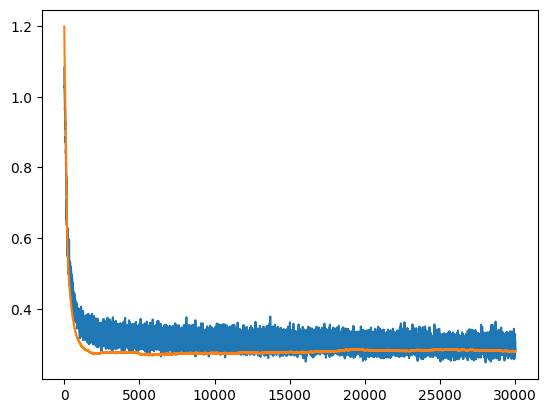

In [252]:
from torch import optim
import matplotlib.pyplot as plt

# Set hyperparameters
torch.manual_seed(42)
lr = .01
input_dim = x_train_tensor.shape[1]
normal_model = ManualRegresion(input_dim).to(device)
optimizer = optim.SGD(normal_model.parameters(), lr = lr)
loss_fn = nn.MSELoss()
n_epochs = 30000
train_losses = []
val_losses = []

# Training loop
for epoch in range(n_epochs):
  normal_model.train()
  optimizer.zero_grad()
  y_pred = normal_model(x_train_tensor)
  loss = loss_fn(y_train_tensor, y_pred)
  loss.backward()
  optimizer.step()
  train_losses.append(loss.detach().cpu().item())

  normal_model.eval()
  with torch.no_grad():
    y_pred = normal_model(x_test_tensor)
    test_loss = loss_fn(y_test_tensor, y_pred)
    val_losses.append(test_loss.cpu().item())


  if (epoch + 1) % 5000 == 0 or epoch == 0:
    print(f'Epoch {epoch + 1}: train loss = {loss.detach().cpu().item()}, val loss = {test_loss.cpu().item()}')

plt.plot(range(n_epochs), train_losses)
plt.plot(range(n_epochs), val_losses)
plt.show()

In [253]:
normal_model

ManualRegresion(
  (fc1): Linear(in_features=24, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)

In [254]:
from torchsummary import summary

summary(normal_model, input_size=(1, input_dim))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 5]             125
              ReLU-2                 [-1, 1, 5]               0
            Linear-3                 [-1, 1, 3]              18
              ReLU-4                 [-1, 1, 3]               0
           Dropout-5                 [-1, 1, 3]               0
            Linear-6                 [-1, 1, 1]               4
Total params: 147
Trainable params: 147
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [255]:
from sklearn.metrics import (mean_absolute_error,
                             mean_absolute_percentage_error,
                             mean_squared_error,
                             r2_score)
#predict the target
normal_model.eval()
with torch.no_grad():
  y_pred = normal_model(x_test_tensor)

#invers transform

y_pred = y_scaler.inverse_transform(y_pred.detach().cpu())
y_test_inversed = y_scaler.inverse_transform(y_test_tensor)

#metrics

scores = {
    'MSE': mean_squared_error(y_pred, y_test_inversed),
    'MAE': mean_absolute_error(y_pred, y_test_inversed),
    'MAPE': mean_absolute_percentage_error(y_pred, y_test_inversed),
    'r_squired': r2_score(y_pred, y_test_inversed),
}

In [256]:
scores

{'MSE': 240693240056769.38,
 'MAE': 12198029.383623347,
 'MAPE': 0.13837379488629967,
 'r_squired': 0.5950601029938081}

In [257]:
#Save the entire model

torch.save(normal_model, "/content/normal_model_full.pth")

In [258]:
import pickle
pickle.dump(x_scaler, open('/content/x_scaler.pkl','wb'))

In [259]:
pickle.dump(y_scaler, open('/content/y_scaler.pkl','wb'))

In [260]:
xs = pickle.load(open('/content/x_scaler.pkl','rb'))

In [261]:
xs

StandardScaler()

In [265]:
import torch

# Load the model
n_model = torch.load("/content/normal_model_full.pth",
                     map_location=torch.device("cpu"),
                     weights_only=False)
n_model.eval()  # Set to evaluation mode for inference

# Example input (replace with your actual input tensor)
input_data = torch.randn(1, 24)  # Example: batch size 1, input size 10
with torch.no_grad():  # Disable gradient computation for inference
    output = n_model(input_data)
print(output)

tensor([[-0.3310]])


In [263]:
normal_model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.1957, -0.0942, -0.0184,  0.1499, -0.1283,  0.3154, -0.0660, -0.0444,
                        0.0758,  0.0058,  0.0070,  0.1543,  0.0387, -0.1792,  0.0841, -0.1210,
                        0.0265,  0.0669, -0.0655, -0.0092, -0.0984,  0.1205, -0.3341,  0.0747],
                      [ 0.0717, -0.0500, -0.0468,  0.0280,  0.0659, -0.0435, -0.4261, -0.4195,
                        0.0183, -0.0782, -0.1088,  0.0463,  0.2137,  0.0775,  0.1106, -0.0231,
                       -0.0116, -0.0280,  0.1416,  0.0648, -0.0304, -0.0304,  0.5640, -0.3049],
                      [ 0.2045, -0.1175, -0.3609,  0.1586,  0.0041,  0.1890,  0.0754,  0.0597,
                       -0.1605,  0.1700,  0.2440, -0.0396,  0.1341, -0.0977,  0.0266,  0.1046,
                        0.0306,  0.1000, -0.0095, -0.0942, -0.0270,  0.0676,  0.3849,  0.0940],
                      [ 0.1148,  0.0017, -0.0111, -0.0014,  0.0720, -0.3766, -0.0823, -0.0730,
                   

In [264]:
#Saving the State Dictionary (Recommended)
# Save only the state dictionary
torch.save(normal_model.state_dict(), 'model_state_dict.pth')

# To load the state dictionary, you need to redefine the model first
model = ManualRegresion()  # Create an instance of the model
model.load_state_dict(torch.load('model_state_dict.pth'))
model.eval()  # Set to evaluation mode

TypeError: ManualRegresion.__init__() missing 1 required positional argument: 'input_dim'

In [266]:
from torch.utils.data import Dataset, DataLoader

df = pd.read_csv('/content/HomeDataset_after_preprocess_04_06.csv')
df = df.dropna()
x = df.drop(['price'], axis= 1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)

#scale the data
x_scaler = StandardScaler()
x_scaler.fit(x_train)
x_train = x_scaler.transform(x_train)
x_test = x_scaler.transform(x_test)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = y_scaler.transform(y_test.values.reshape(-1,1))

class CustomDataset(Dataset):
  def __init__(self, data, target):
    self.data = torch.tensor(data, dtype = torch.float32)
    self.target = torch.tensor(target, dtype = torch.float32)

  def __getitem__(self, index):
     return self.data[index], self.target[index]

  def __len__(self):
    return len(self.data)

In [267]:
train_dataset = CustomDataset(x_train, y_train)
val_dataset = CustomDataset(x_test, y_test)

In [268]:
train_dataset[0]

(tensor([ 2.2818e-02, -2.4677e-01, -8.6698e-01,  1.1302e+00,  1.5780e-01,
         -2.7422e+00, -1.0679e+00,  1.0650e+00, -1.8608e-01, -1.3820e-01,
          2.5228e-03, -9.0912e-01, -1.2437e+00,  1.7648e-01,  1.3105e-01,
         -1.3558e+00,  6.2276e-02,  2.8468e-01, -1.3808e+00,  3.6543e-01,
         -1.2413e+00, -1.3210e+00, -1.3645e+00, -9.1043e-01]),
 tensor([-2.3175]))

In [269]:
len(train_dataset)

747

In [270]:
df.shape

(934, 25)

In [292]:
batch_size = 16
train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle= True)
test_loader = DataLoader(val_dataset,
                         batch_size=batch_size,
                         shuffle= False)

In [293]:
len(train_loader)

47

Epoch 1: train loss = 1.0171162384621641, val loss = 1.0359612728158634
Epoch 500: train loss = 0.30610071518953813, val loss = 0.29423292229572934
Epoch 1000: train loss = 0.26408118263204045, val loss = 0.29379818712671596
Epoch 1500: train loss = 0.2814188000369579, val loss = 0.290275190025568
Epoch 2000: train loss = 0.2994281215236542, val loss = 0.28465742245316505
Epoch 2500: train loss = 0.30861632906376046, val loss = 0.28516417120893794


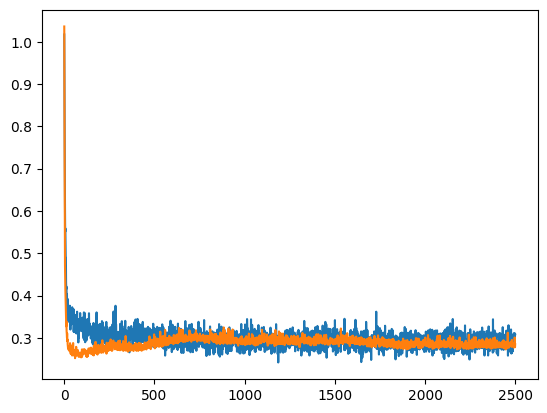

In [295]:
from torch import optim
import matplotlib.pyplot as plt

# Set hyperparameters
torch.manual_seed(42)
lr = .01
input_dim = x_train_tensor.shape[1]
normal_model = ManualRegresion(input_dim).to(device)
optimizer = optim.SGD(normal_model.parameters(), lr = lr)
loss_fn = nn.MSELoss()
n_epochs = 2500
train_losses = []
val_losses = []

def train(model, dataloader, optimizer, loss_fn):
    model.train()
    epoch_loss = 0
    for inputs, targets in dataloader:
      inputs, targets = inputs.to(device), targets.to(device)
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = loss_fn(targets, outputs)
      loss.backward()
      optimizer.step()
      epoch_loss += loss.detach().cpu().item()
    return epoch_loss/len(dataloader)

def validate(model, dataloader, loss_fn):
    model.eval()
    epoch_loss = 0
    for inputs, targets in dataloader:
      inputs, targets = inputs.to(device), targets.to(device)
      with torch.no_grad():
        outputs = model(inputs)
      loss = loss_fn(targets, outputs)
      epoch_loss += loss.detach().cpu().item()
    return epoch_loss/len(dataloader)


for epoch in range(n_epochs):
  train_loss = train(normal_model,train_loader,optimizer, loss_fn)
  train_losses.append(train_loss)
  val_loss = validate(normal_model, test_loader, loss_fn)
  val_losses.append(val_loss)
  if (epoch + 1) % 500 == 0 or epoch == 0:
    print(f'Epoch {epoch + 1}: train loss = {train_loss}, val loss = {val_loss}')

plt.plot(range(n_epochs), train_losses)
plt.plot(range(n_epochs), val_losses)
plt.show()

In [296]:
from torchsummary import summary

summary(normal_model, input_size=(1, input_dim))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 5]             125
              ReLU-2                 [-1, 1, 5]               0
            Linear-3                 [-1, 1, 3]              18
              ReLU-4                 [-1, 1, 3]               0
           Dropout-5                 [-1, 1, 3]               0
            Linear-6                 [-1, 1, 1]               4
Total params: 147
Trainable params: 147
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [297]:
from sklearn.metrics import (mean_absolute_error,
                             mean_absolute_percentage_error,
                             mean_squared_error,
                             r2_score)
#predict the target
normal_model.eval()
with torch.no_grad():
  y_pred = normal_model(x_test_tensor)

#invers transform

y_pred = y_scaler.inverse_transform(y_pred.detach().cpu())
y_test_inversed = y_scaler.inverse_transform(y_test_tensor)

#metrics

scores = {
    'MSE': mean_squared_error(y_pred, y_test_inversed),
    'MAE': mean_absolute_error(y_pred, y_test_inversed),
    'MAPE': mean_absolute_percentage_error(y_pred, y_test_inversed),
    'r_squired': r2_score(y_pred, y_test_inversed),
}

In [298]:
scores

{'MSE': 266892434963538.84,
 'MAE': 12894561.34960309,
 'MAPE': 0.1422954475680544,
 'r_squired': 0.5454440438093154}

Epoch 1: train loss = 1.0171162384621641, val loss = 1.0359612728158634
Epoch 100: train loss = 0.32118882175455704, val loss = 0.2567703438301881
Epoch 200: train loss = 0.31701204418501955, val loss = 0.26680371599892777
Epoch 300: train loss = 0.29165043063620305, val loss = 0.2928166004518668
Epoch 400: train loss = 0.27297871544006025, val loss = 0.2723846050600211
Epoch 500: train loss = 0.30610071518953813, val loss = 0.29423292229572934
Epoch 600: train loss = 0.30355033817443444, val loss = 0.28798112149039906
Epoch 700: train loss = 0.3067213407856353, val loss = 0.310442919532458
Epoch 800: train loss = 0.3077680950469159, val loss = 0.2928219102323055
Epoch 900: train loss = 0.27866235010801477, val loss = 0.28825321172674495
Epoch 1000: train loss = 0.26408118263204045, val loss = 0.29379818712671596


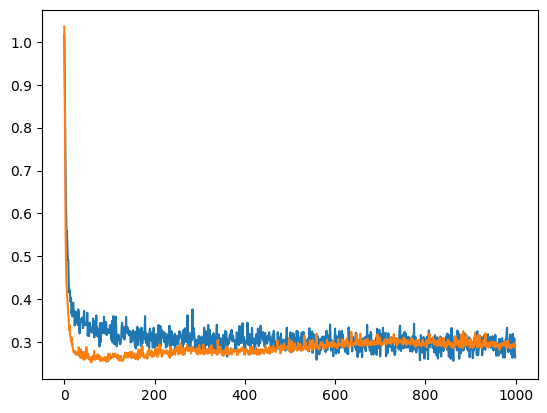

In [308]:
from torch import optim
import matplotlib.pyplot as plt

# Set hyperparameters
torch.manual_seed(42)
lr = .01
input_dim = x_train_tensor.shape[1]
normal_model = ManualRegresion(input_dim).to(device)
optimizer = optim.SGD(normal_model.parameters(), lr = lr)
loss_fn = nn.MSELoss()
n_epochs = 1000
train_losses = []
val_losses = []

def train(model, dataloader, optimizer, loss_fn):
    model.train()
    epoch_loss = 0
    for inputs, targets in dataloader:
      inputs, targets = inputs.to(device), targets.to(device)
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = loss_fn(targets, outputs)
      loss.backward()
      optimizer.step()
      epoch_loss += loss.detach().cpu().item()
    return epoch_loss/len(dataloader)

def validate(model, dataloader, loss_fn):
    model.eval()
    epoch_loss = 0
    for inputs, targets in dataloader:
      inputs, targets = inputs.to(device), targets.to(device)
      with torch.no_grad():
        outputs = model(inputs)
      loss = loss_fn(targets, outputs)
      epoch_loss += loss.detach().cpu().item()
    return epoch_loss/len(dataloader)


for epoch in range(n_epochs):
  train_loss = train(normal_model,train_loader,optimizer, loss_fn)
  train_losses.append(train_loss)
  val_loss = validate(normal_model, test_loader, loss_fn)
  val_losses.append(val_loss)
  if (epoch + 1) % 100 == 0 or epoch == 0:
    print(f'Epoch {epoch + 1}: train loss = {train_loss}, val loss = {val_loss}')

plt.plot(range(n_epochs), train_losses)
plt.plot(range(n_epochs), val_losses)
plt.show()